This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
[ -1.3475 539.    ]
[   0.6 -240. ]
[-2.65555556e-01  5.39000000e+02]
[[  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 ...
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [537 537 537 ... 537 537 537]
 [538 538 538 ... 538 538 538]
 [539 539 539 ... 539 539 539]]
regiOn
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False  True ... False False False]
 [False  True  True ... False False False]
 [False False False ... False False False]]


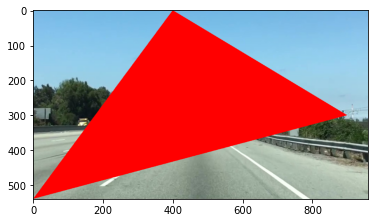

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image and print some stats
image = mpimg.imread('test.jpg')
print('This image is: ', type(image), 
         'with dimensions:', image.shape)

# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, ysize-1]
right_bottom = [xsize-60, ysize-240]
apex = [xsize/2-80, 0]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

print(fit_left)
print(fit_right)
print(fit_bottom)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
print(XX)
print(YY)
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

print("regiOn")
print(region_thresholds)
# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

# uncomment if plot does not display
plt.show()
